In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

def read_file(file):
    # Read the data
    df = pd.read_csv(file, index_col=0)
    df.rename(columns={'SynBA_Annotation': 'SynBA', 'TextFooler_Annotation': 'TextFooler', 'BAE_Annotation': 'BAE'}, inplace=True)
    df = df.drop('Attack', axis=1).apply(pd.Series.value_counts).T.reset_index().melt(id_vars="index", var_name="label")
    df.rename(columns={"index":"attack method", "value": "count"}, inplace=True)
    return df

In [66]:
files = list(Path('.').glob("*.csv"))
dfs = [read_file(file) for file in files]

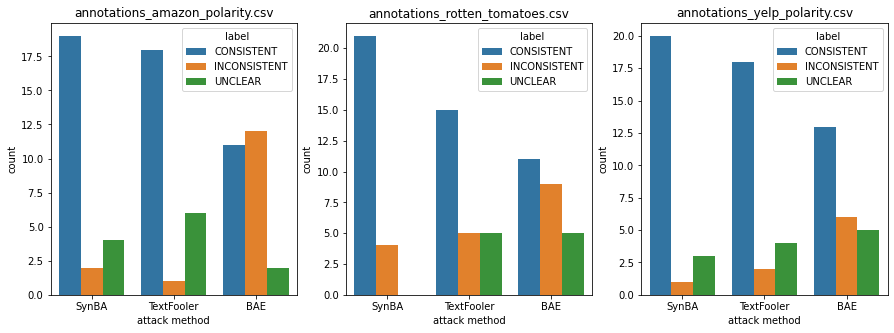

In [67]:
fig, ax = plt.subplots(1, len(files), figsize=(15,5))
for i, file in enumerate(files):
    df = read_file(file)
    sns.barplot(x='attack method', y='count', hue="label", data=df, ax=ax[i])
    ax[i].set_title(f"{file.name}")
plt.show()